Vysvetlivky k stlpcom z: https://www.kaggle.com/fedesoriano/stroke-prediction-dataset?fbclid=IwAR1JNHGZbEhtzY0LdMW5YjkyT4JhRp1A8qzUhEFxai2b-2nRhw4JFQcNx-0

* id: unique identifier
* gender: "Male", "Female" or "Other"
* age: age of the patient
* hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
* heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
* ever_married: "No" or "Yes"
* work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
* Residence_type: "Rural" or "Urban"
* avg_glucose_level: average glucose level in blood
* bmi: body mass index
* smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
* stroke: 1 if the patient had a stroke or 0 if not
*Note: "Unknown" in smoking_status means that the information is unavailable for this patient

In [1]:
install.packages("moments")
install.packages("dplyr")
install.packages("ggpubr")
install.packages("nortest")
install.packages("ggplot2")
install.packages('ggbeeswarm')
install.packages('ggforce')
install.packages('corrplot')
install.packages('caret')

library(ggplot2)
library(ggbeeswarm)
library(ggforce)
library(moments)
library(nortest)
library(corrplot)
library(dplyr)
library(caret)

package 'moments' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\kristof\AppData\Local\Temp\RtmpAlgsAH\downloaded_packages
package 'dplyr' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\kristof\AppData\Local\Temp\RtmpAlgsAH\downloaded_packages
package 'ggpubr' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\kristof\AppData\Local\Temp\RtmpAlgsAH\downloaded_packages
package 'nortest' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\kristof\AppData\Local\Temp\RtmpAlgsAH\downloaded_packages
package 'ggplot2' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\kristof\AppData\Local\Temp\RtmpAlgsAH\downloaded_packages
package 'ggbeeswarm' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\kristof\AppData\Local\Temp\RtmpAlgsAH\downloaded_p

Warning message:
"package 'ggplot2' was built under R version 3.6.3"Warning message:
"package 'ggbeeswarm' was built under R version 3.6.3"Warning message:
"package 'ggforce' was built under R version 3.6.3"Warning message:
"package 'corrplot' was built under R version 3.6.3"corrplot 0.84 loaded
Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Warning message:
"package 'caret' was built under R version 3.6.3"Loading required package: lattice
Warning message:
"package 'lattice' was built under R version 3.6.3"

Nacitaj data:

In [2]:
df = read.csv("./data/healthcare-dataset-stroke-data.xls")
head(df)

id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
9046,Male,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
51676,Female,61,0,0,Yes,Self-employed,Rural,202.21,N/A,never smoked,1
31112,Male,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
60182,Female,49,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
1665,Female,79,1,0,Yes,Self-employed,Rural,174.12,24,never smoked,1
56669,Male,81,0,0,Yes,Private,Urban,186.21,29,formerly smoked,1


### Zakladne info o datach

Najskor nas zaujima vyskyt abnormalit ako chybajuce hodnoty alebo hodnoty ktore nie su realne. 

Z nizsie uvedeneho sumaru vidime napriklad, ze znak 'gender' ma 3 rozne kategorie, pricom sa ocakavaju len 2 a ze tretiu kategoriu ma len jedno pozorovanie. 

Dalej znak 'bmi' je uvedeny ako kategoricke data, hoci by sme ocakavali skor ciselne vyjadrenie.

In [3]:
str(df)

'data.frame':	5110 obs. of  12 variables:
 $ id               : int  9046 51676 31112 60182 1665 56669 53882 10434 27419 60491 ...
 $ gender           : Factor w/ 3 levels "Female","Male",..: 2 1 2 1 1 2 2 1 1 1 ...
 $ age              : num  67 61 80 49 79 81 74 69 59 78 ...
 $ hypertension     : int  0 0 0 0 1 0 1 0 0 0 ...
 $ heart_disease    : int  1 0 1 0 0 0 1 0 0 0 ...
 $ ever_married     : Factor w/ 2 levels "No","Yes": 2 2 2 2 2 2 2 1 2 2 ...
 $ work_type        : Factor w/ 5 levels "children","Govt_job",..: 4 5 4 4 5 4 4 4 4 4 ...
 $ Residence_type   : Factor w/ 2 levels "Rural","Urban": 2 1 1 2 1 2 1 2 1 2 ...
 $ avg_glucose_level: num  229 202 106 171 174 ...
 $ bmi              : Factor w/ 419 levels "10.3","11.3",..: 240 419 199 218 114 164 148 102 419 116 ...
 $ smoking_status   : Factor w/ 4 levels "formerly smoked",..: 1 2 2 3 2 1 2 2 4 4 ...
 $ stroke           : int  1 1 1 1 1 1 1 1 1 1 ...


In [4]:
summary(df)

       id           gender          age         hypertension    
 Min.   :   67   Female:2994   Min.   : 0.08   Min.   :0.00000  
 1st Qu.:17741   Male  :2115   1st Qu.:25.00   1st Qu.:0.00000  
 Median :36932   Other :   1   Median :45.00   Median :0.00000  
 Mean   :36518                 Mean   :43.23   Mean   :0.09746  
 3rd Qu.:54682                 3rd Qu.:61.00   3rd Qu.:0.00000  
 Max.   :72940                 Max.   :82.00   Max.   :1.00000  
                                                                
 heart_disease     ever_married         work_type    Residence_type
 Min.   :0.00000   No :1757     children     : 687   Rural:2514    
 1st Qu.:0.00000   Yes:3353     Govt_job     : 657   Urban:2596    
 Median :0.00000                Never_worked :  22                 
 Mean   :0.05401                Private      :2925                 
 3rd Qu.:0.00000                Self-employed: 819                 
 Max.   :1.00000                                                   
    

Identifikator nie je sam o sebe zaujimavy, ale ocakavame ze vsetky hodnoty tohto stlpca budu unikatne:

In [5]:
nrow(unique(df[c("id")])) == nrow(df[c("id")])

[1] TRUE

Stlpec 'gender' ma 3 unikatne hodnoty. Tretia hodnota je 'Other' a vyskytuje sa v jedinom pozorovani. Kedze sa jedna o jedine pozorovanie a nevieme pohlavie urcit, toto pozorovanie odstranime a budeme uvazovat len 2 pohlavia. 

In [6]:
unique(df[c("gender")])

,gender
1,Male
2,Female
3117,Other


In [7]:
df = df[df$gender != 'Other', ]

In [8]:
unique(df[c("gender")])

gender
Male
Female


Znak 'bmi' sa rozoznal ako kategoricky pre nerozoznane NA hodnoty. Preto ich transformujeme. Taktiez kategoriu 'Unknown' v znaku 'smoking_status' mozeme previest na NA pre konzistenciu.

In [9]:
df[] <- lapply(df, function(x) {
    is.na(levels(x)) <- levels(x) == "N/A"
    x
})

df[] <- lapply(df, function(x) {
    is.na(levels(x)) <- levels(x) == "Unknown"
    x
})

Teraz sa vieme pozriet, kde mame NA:

In [10]:
apply(df, 2, function(x) any(is.na(x)))

id            gender               age      hypertension 
            FALSE             FALSE             FALSE             FALSE 
    heart_disease      ever_married         work_type    Residence_type 
            FALSE             FALSE             FALSE             FALSE 
avg_glucose_level               bmi    smoking_status            stroke 
            FALSE              TRUE              TRUE             FALSE

In [11]:
df['bmi'] = sapply(df['bmi'], as.character)
df['bmi'] = sapply(df['bmi'], as.numeric)

In [12]:
summary(df)

       id           gender          age         hypertension    
 Min.   :   67   Female:2994   Min.   : 0.08   Min.   :0.00000  
 1st Qu.:17740   Male  :2115   1st Qu.:25.00   1st Qu.:0.00000  
 Median :36922   Other :   0   Median :45.00   Median :0.00000  
 Mean   :36514                 Mean   :43.23   Mean   :0.09748  
 3rd Qu.:54643                 3rd Qu.:61.00   3rd Qu.:0.00000  
 Max.   :72940                 Max.   :82.00   Max.   :1.00000  
                                                                
 heart_disease     ever_married         work_type    Residence_type
 Min.   :0.00000   No :1756     children     : 687   Rural:2513    
 1st Qu.:0.00000   Yes:3353     Govt_job     : 657   Urban:2596    
 Median :0.00000                Never_worked :  22                 
 Mean   :0.05402                Private      :2924                 
 3rd Qu.:0.00000                Self-employed: 819                 
 Max.   :1.00000                                                   
    

Máme teda 2 numerické atribúty, 5 kategorických a 3 binárne. Prakticky by sme vedeli atribúty gender, ever_married a Residence_type zmeniť tiež na binárne.  

In [13]:
modus <- function(v) {
   uniqv <- unique(v)
   uniqv[which.max(tabulate(match(v, uniqv)))]
}

## Analýza numerických znakov (age, bmi, avg_glucose_level)

### age(vek):
Hoci nasledovné hodnoty máme vypočítané už vyššie, uvádzame ich ešte raz pre úplnosť, ako aj kvôli overeniu ich správnosti:

In [14]:
print(paste("Počet: ", toString(NROW(df$age))))
print(paste("Minimum: ", toString(min(df$age))))
print(paste("Maximum: ", toString(max(df$age))))
print(paste("Priemer: ", toString(apply(df['age'], 2, mean))))
print(paste("Medián: ", toString(apply(df['age'], 2, median))))
print(paste("Modus: ", toString(apply(df['age'], 2, modus))))
print(paste("Rozptyl: ", toString(var(df$age))))
print(paste("Smerodajná odchýlka: ", toString(sd(df$age))))
print(paste("Koeficient asymetrie: ", toString(skewness(df$age))))
print(paste("Špicatosť: ", toString(kurtosis(df$age))))
print("Kvantily: ")
quantile(df$age)

[1] "Pocet:  5109"
[1] "Minimum:  0.08"
[1] "Maximum:  82"
[1] "Priemer:  43.2299862986886"
[1] "Medián:  45"
[1] "Modus:  78"
[1] "Rozptyl:  511.373788194801"
[1] "Smerodajná odchýlka:  22.6135753076509"
[1] "Koeficient asymetrie:  -0.137389839898049"
[1] "Špicatost:  2.00886445297715"
[1] "Kvantily: "


0%   25%   50%   75%  100% 
 0.08 25.00 45.00 61.00 82.00

obkec sem

Základné grafy:

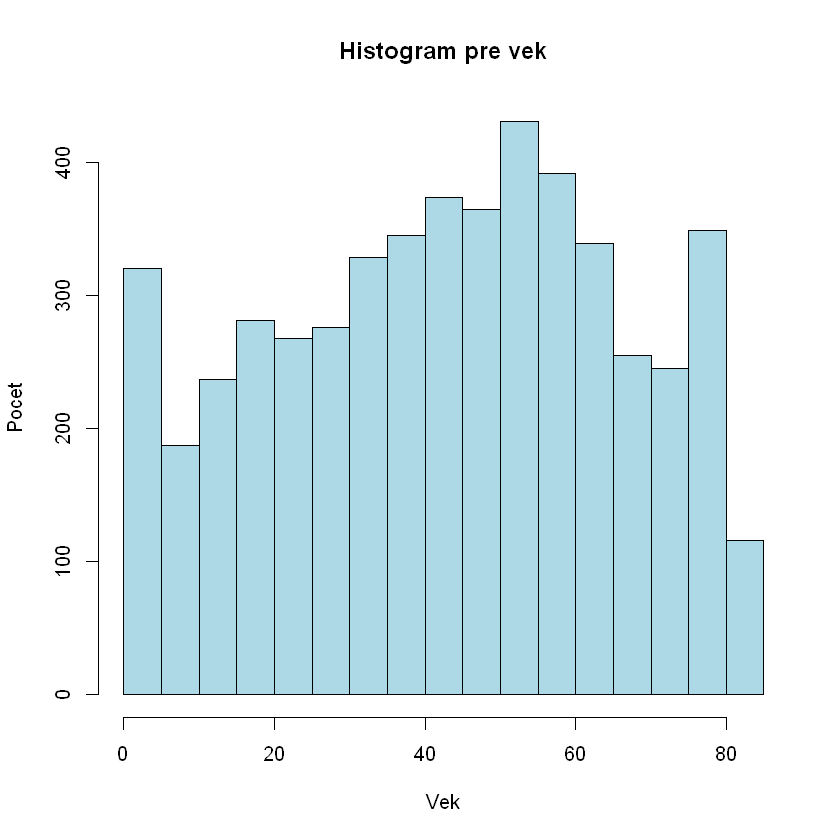

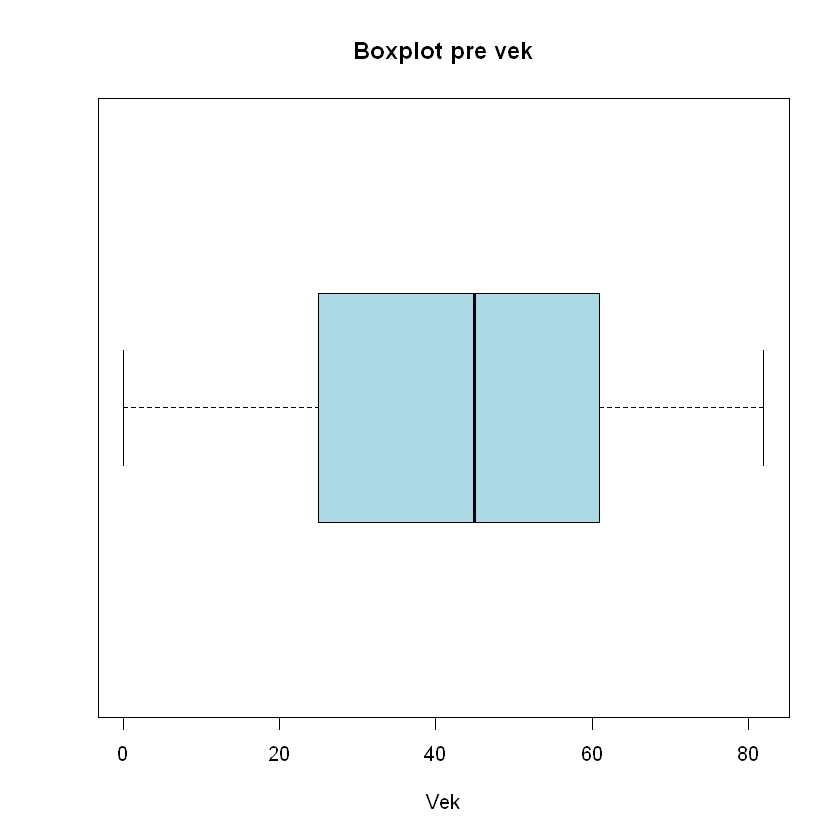

In [15]:
hist(df$age
    , xlab="Vek"
    , ylab="Pocet"
    , main="Histogram pre vek"
    , col="lightblue")

boxplot(df$age, horizontal=TRUE, xlab="Vek", main="Boxplot pre vek", col="lightblue")

Obkec ku grafom sem

Analýza rozdelenia:

Su data z norm. rozd.? <br>
H0: Data su z norm. rozd. <br>
H1: Data nie su z norm. rozd.

Q-Q plot

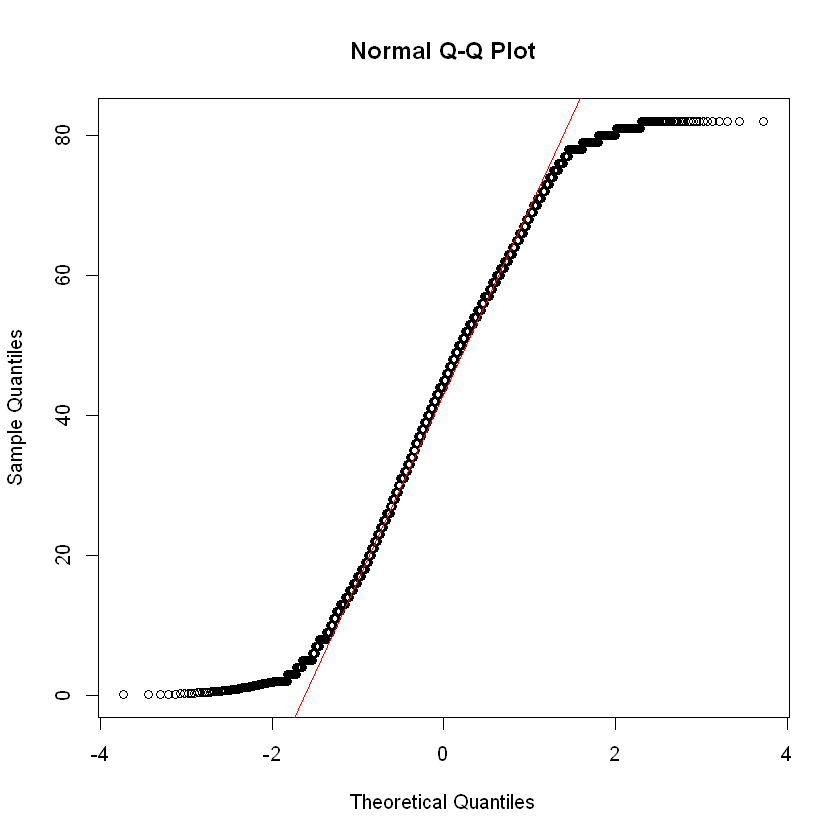

In [16]:
qqnorm(df$age)
qqline(df$age, col = 2)

Obkec

In [17]:
#Shapiro-Wilk test je do max 5000 zaznamov.
shap_test <- shapiro.test(df$age[0:5000])
shap_test


	Shapiro-Wilk normality test

data:  df$age[0:5000]
W = 0.96693, p-value < 2.2e-16


In [18]:
cat("p-value: ", shap_test$p.value, "\n")
if (shap_test$p.value > 0.05) {
    print("Nemozeme zamietnut H0")
} else print ("Zamietame H0, data nie su z norm. rozd.")

p-value:  2.058166e-32 
[1] "Zamietame H0, data nie su z norm. rozd."


In [19]:
#Anderson-Darling normality test
ad_test <- ad.test(df$age)

In [20]:
cat("p-value: ", ad_test$p.value, "\n")
if (ad_test$p.value > 0.05) {
    print("Nemozeme zamietnut H0")
} else print ("Zamietame H0, data nie su z norm. rozd.")

p-value:  3.7e-24 
[1] "Zamietame H0, data nie su z norm. rozd."


## bmi

In [21]:
#remove NA
bmi_no_na <- na.omit(df$bmi)

In [22]:
print(paste("Počet: ", toString(NROW(bmi_no_na))))
print(paste("Minimum: ", toString(min(bmi_no_na))))
print(paste("Maximum: ", toString(max(bmi_no_na))))
print(paste("Priemer: ", toString(apply(bmi_no_na, 2, mean))))
print(paste("Medián: ", toString(apply(bmi_no_na, 2, median))))
print(paste("Modus: ", toString(apply(bmi_no_na, 2, modus))))
print(paste("Rozptyl: ", toString(var(bmi_no_na))))
print(paste("Smerodajná odchýlka: ", toString(sd(bmi_no_na))))
print(paste("Koeficient asymetrie: ", toString(skewness(bmi_no_na))))
print(paste("Špicatosť: ", toString(kurtosis(bmi_no_na))))
print("Kvantily: ")
quantile(bmi_no_na)

[1] "Pocet:  4908"
[1] "Minimum:  10.3"
[1] "Maximum:  97.6"
[1] "Priemer:  28.8945599022005"
[1] "Medián:  28.1"
[1] "Modus:  28.7"
[1] "Rozptyl:  61.6903412980209"
[1] "Smerodajná odchýlka:  7.85431991314467"
[1] "Koeficient asymetrie:  1.05474046966251"
[1] "Špicatost:  6.35768309160711"
[1] "Kvantily: "


0%  25%  50%  75% 100% 
10.3 23.5 28.1 33.1 97.6

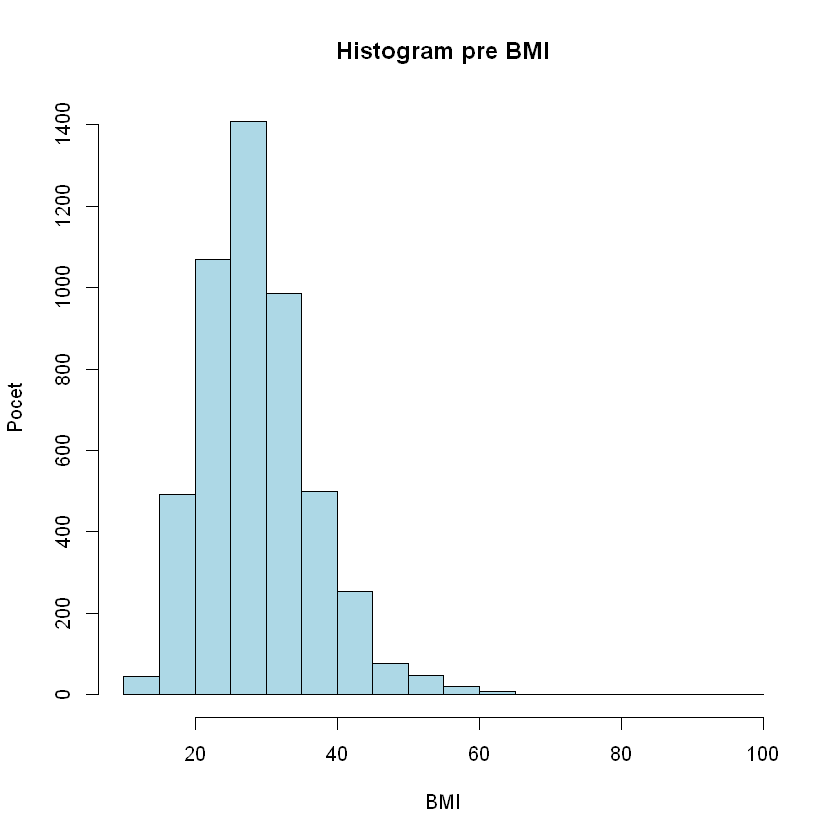

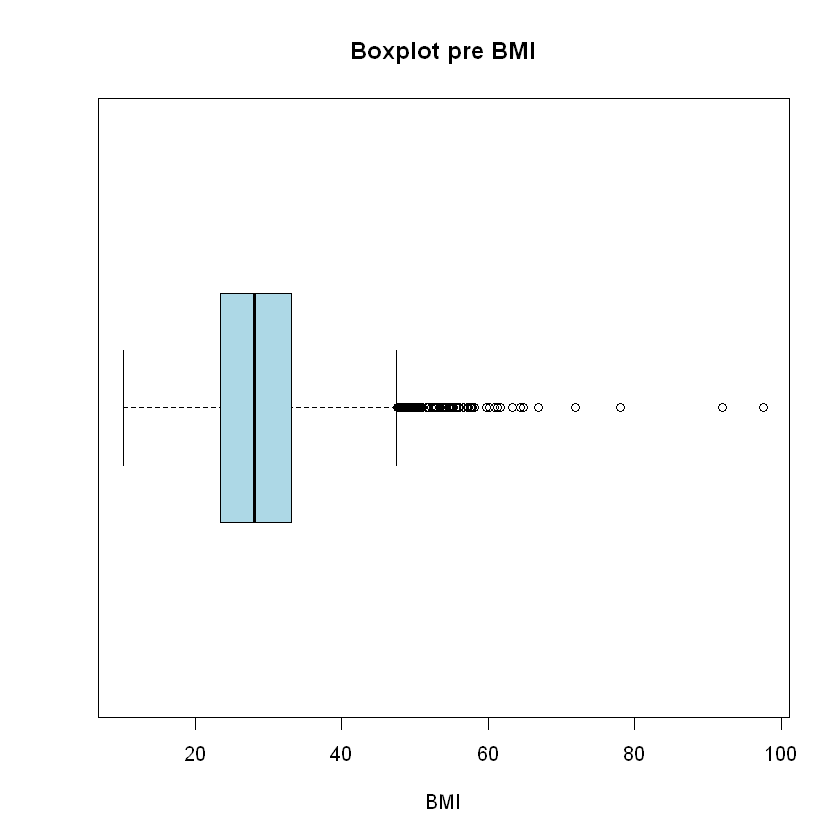

In [23]:
hist(bmi_no_na
    , xlab="BMI"
    , ylab="Pocet"
    , main="Histogram pre BMI"
    , col="lightblue")

boxplot(bmi_no_na, horizontal=TRUE, xlab="BMI", main="Boxplot pre BMI", col="lightblue")

Su data z norm. rozd.? <br>
H0: Data su z norm. rozd. <br>
H1: Data nie su z norm. rozd.

Q-Q plot

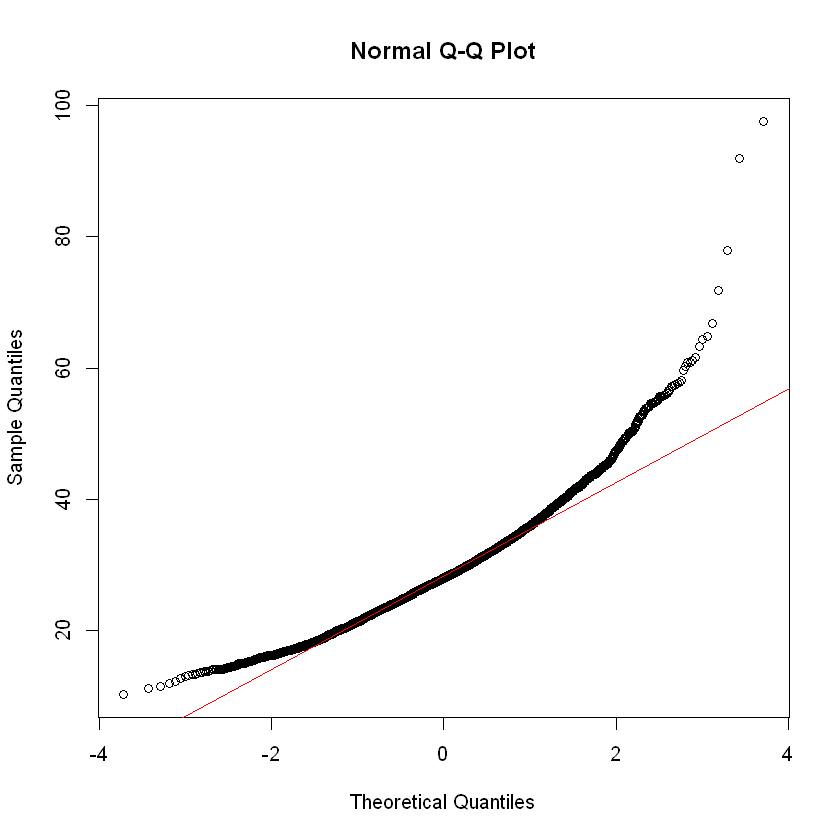

In [24]:
qqnorm(bmi_no_na)
qqline(bmi_no_na, col = 2)

In [25]:
#Shapiro-Wilk test je do max 5000 zaznamov.
shap_test <- shapiro.test(bmi_no_na[0:5000])
shap_test


	Shapiro-Wilk normality test

data:  bmi_no_na[0:5000]
W = 0.95357, p-value < 2.2e-16


In [26]:
cat("p-value: ", shap_test$p.value, "\n")
if (shap_test$p.value > 0.05) {
    print("Nemozeme zamietnut H0")
} else print ("Zamietame H0, data nie su z norm. rozd.")

p-value:  6.759068e-37 
[1] "Zamietame H0, data nie su z norm. rozd."


In [27]:
#Anderson-Darling normality test
ad_test <- ad.test(bmi_no_na)

In [28]:
cat("p-value: ", ad_test$p.value, "\n")
if (ad_test$p.value > 0.05) {
    print("Nemozeme zamietnut H0")
} else print ("Zamietame H0, data nie su z norm. rozd.")

p-value:  3.7e-24 
[1] "Zamietame H0, data nie su z norm. rozd."


### avg_glucose_level

In [29]:
print(paste("Počet: ", toString(NROW(df$avg_glucose_level))))
print(paste("Minimum: ", toString(min(df$avg_glucose_level))))
print(paste("Maximum: ", toString(max(df$avg_glucose_level))))
print(paste("Priemer: ", toString(apply(df['avg_glucose_level'], 2, mean))))
print(paste("Medián: ", toString(apply(df['avg_glucose_level'], 2, median))))
print(paste("Modus: ", toString(apply(df['avg_glucose_level'], 2, modus))))
print(paste("Rozptyl: ", toString(var(df$avg_glucose_level))))
print(paste("Smerodajná odchýlka: ", toString(sd(df$avg_glucose_level))))
print(paste("Koeficient asymetrie: ", toString(skewness(df$avg_glucose_level))))
print(paste("Špicatosť: ", toString(kurtosis(df$avg_glucose_level))))
print("Kvantily: ")
quantile(df$avg_glucose_level)

[1] "Pocet:  5109"
[1] "Minimum:  55.12"
[1] "Maximum:  271.74"
[1] "Priemer:  106.140399295361"
[1] "Medián:  91.88"
[1] "Modus:  93.88"
[1] "Rozptyl:  2050.73155700576"
[1] "Smerodajná odchýlka:  45.2850036657364"
[1] "Koeficient asymetrie:  1.57235351298891"
[1] "Špicatost:  4.67890189554881"
[1] "Kvantily: "


0%    25%    50%    75%   100% 
 55.12  77.24  91.88 114.09 271.74

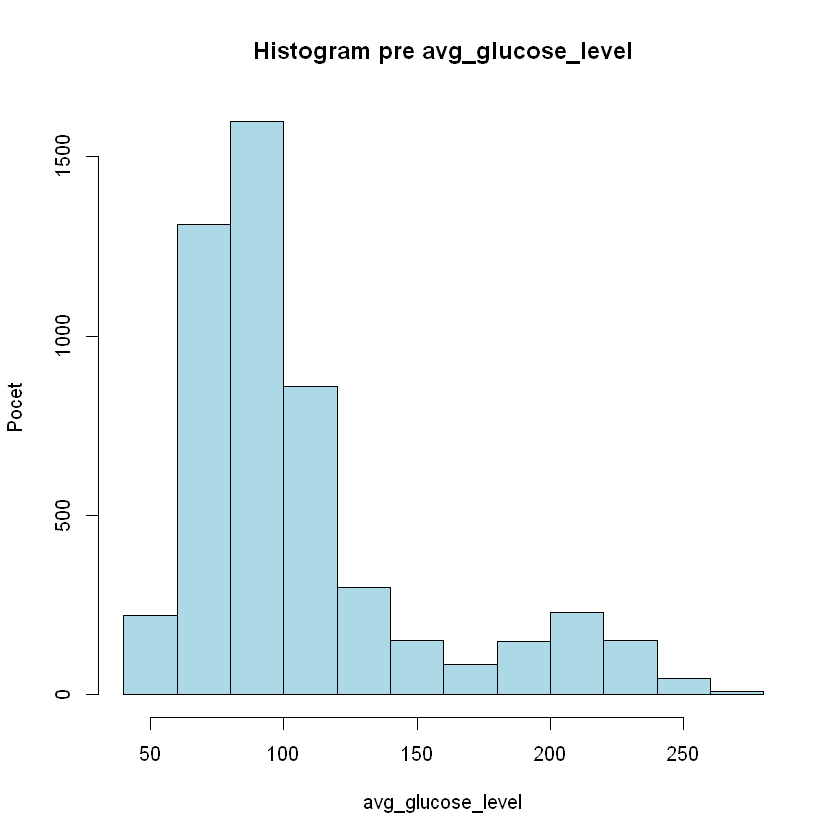

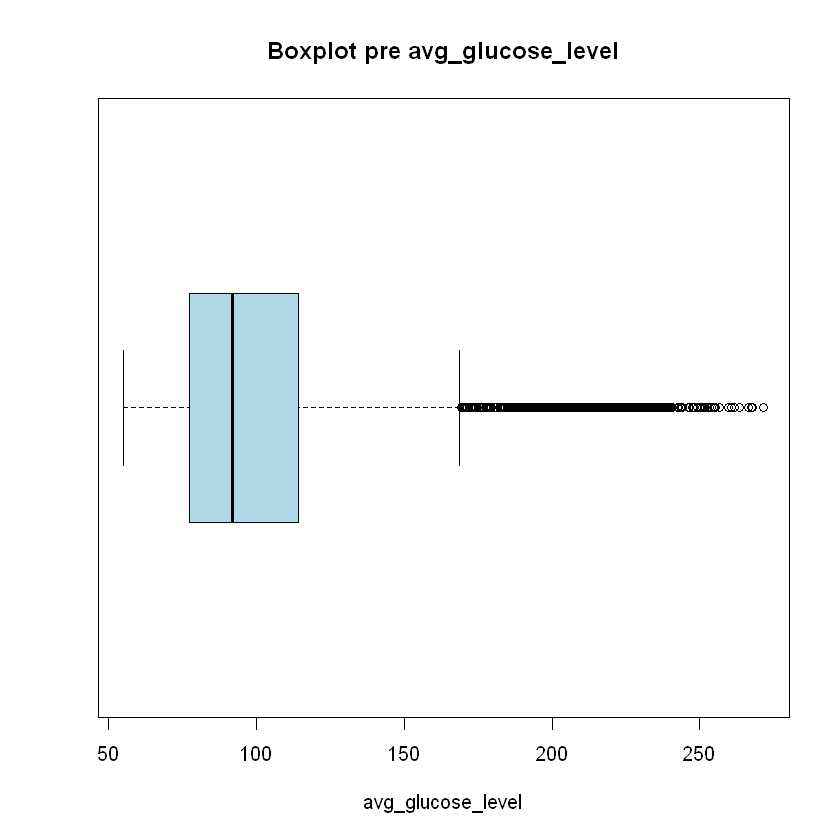

In [30]:
hist(df$avg_glucose_level
    , xlab="avg_glucose_level"
    , ylab="Pocet"
    , main="Histogram pre avg_glucose_level"
    , col="lightblue")

boxplot(df$avg_glucose_level, horizontal=TRUE, xlab="avg_glucose_level", main="Boxplot pre avg_glucose_level", col="lightblue")

Su data z norm. rozd.? <br>
H0: Data su z norm. rozd. <br>
H1: Data nie su z norm. rozd.

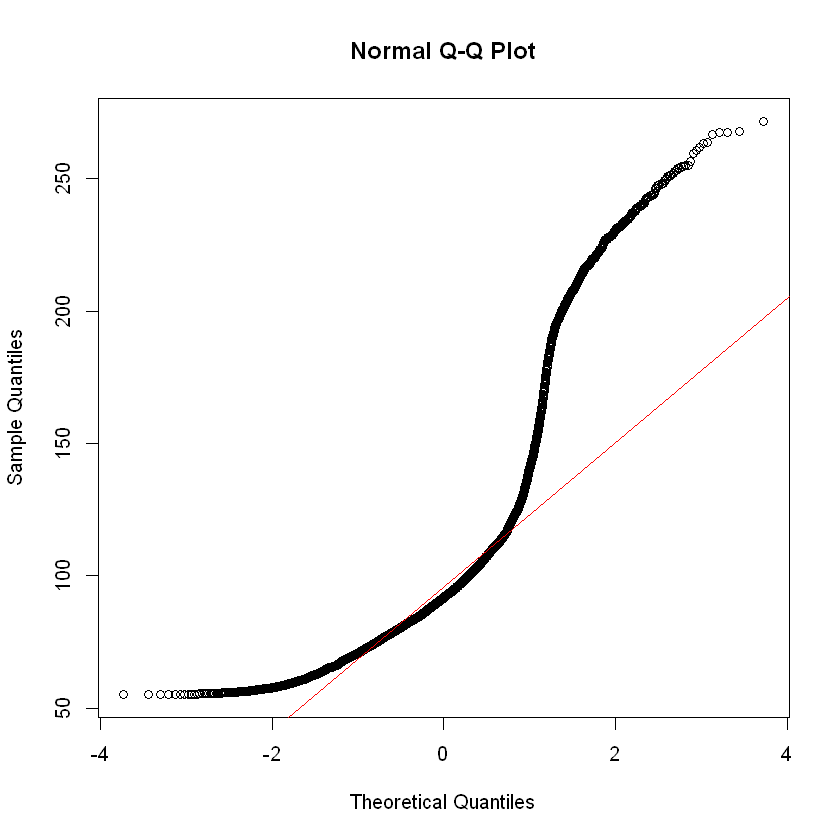

In [31]:
qqnorm(df$avg_glucose_level)
qqline(df$avg_glucose_level, col = 2)

In [32]:
#Shapiro-Wilk test je do max 5000 zaznamov.
shap_test <- shapiro.test(df$avg_glucose_level[0:5000])
shap_test


	Shapiro-Wilk normality test

data:  df$avg_glucose_level[0:5000]
W = 0.80521, p-value < 2.2e-16


In [33]:
cat("p-value: ", shap_test$p.value, "\n")
if (shap_test$p.value > 0.05) {
    print("Nemozeme zamietnut H0")
} else print ("Zamietame H0, data nie su z norm. rozd.")

p-value:  4.314657e-61 
[1] "Zamietame H0, data nie su z norm. rozd."


In [34]:
#Anderson-Darling normality test
ad_test <- ad.test(df$avg_glucose_level)

In [35]:
cat("p-value: ", ad_test$p.value, "\n")
if (ad_test$p.value > 0.05) {
    print("Nemozeme zamietnut H0")
} else print ("Zamietame H0, data nie su z norm. rozd.")

p-value:  3.7e-24 
[1] "Zamietame H0, data nie su z norm. rozd."


#### Párová analýza - numerické VS kategorické a binárne

Warning message:
"Removed 201 rows containing non-finite values (stat_ydensity)."Warning message:
"Removed 201 rows containing non-finite values (stat_sina)."Warning message:
"Removed 201 rows containing non-finite values (stat_ydensity)."Warning message:
"Removed 201 rows containing non-finite values (stat_sina)."

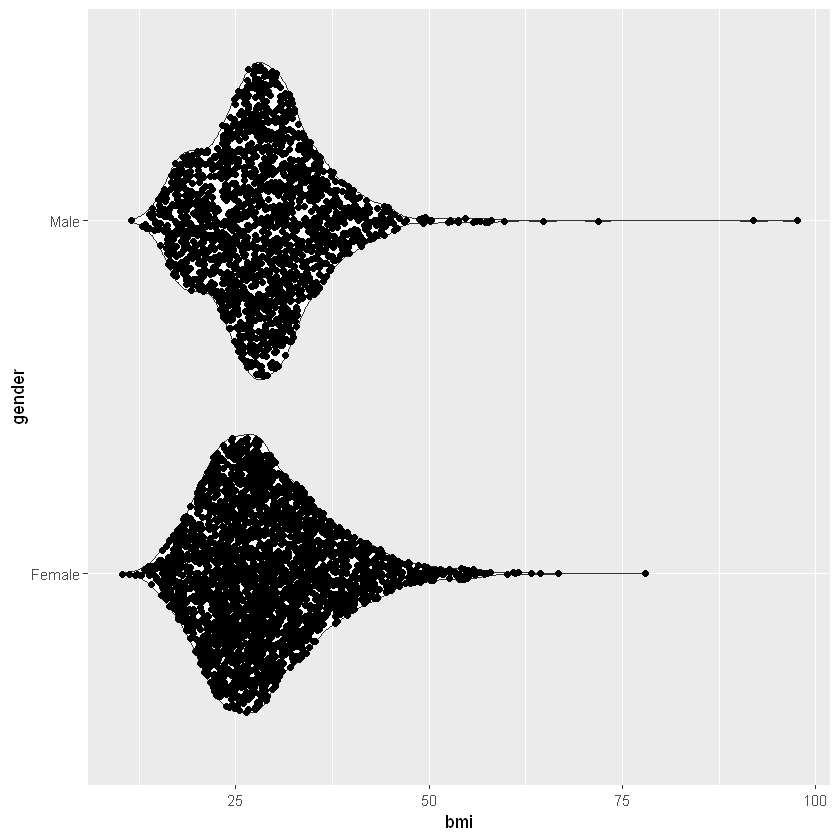

Warning message:
"Removed 201 rows containing non-finite values (stat_ydensity)."Warning message:
"Removed 201 rows containing non-finite values (stat_sina)."

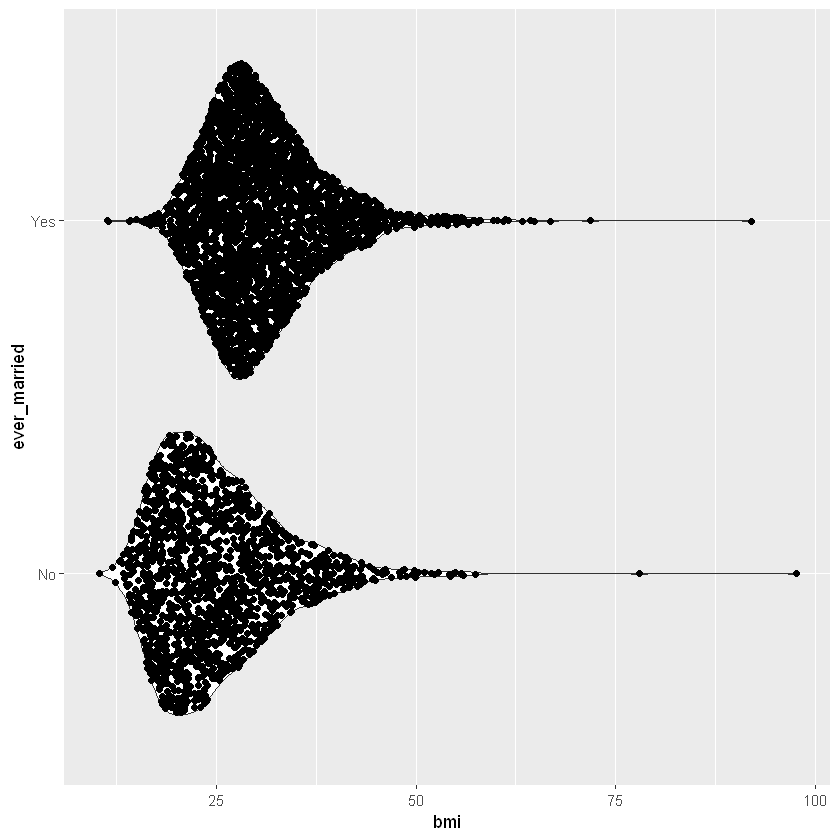

Warning message:
"Removed 201 rows containing non-finite values (stat_ydensity)."Warning message:
"Removed 201 rows containing non-finite values (stat_sina)."

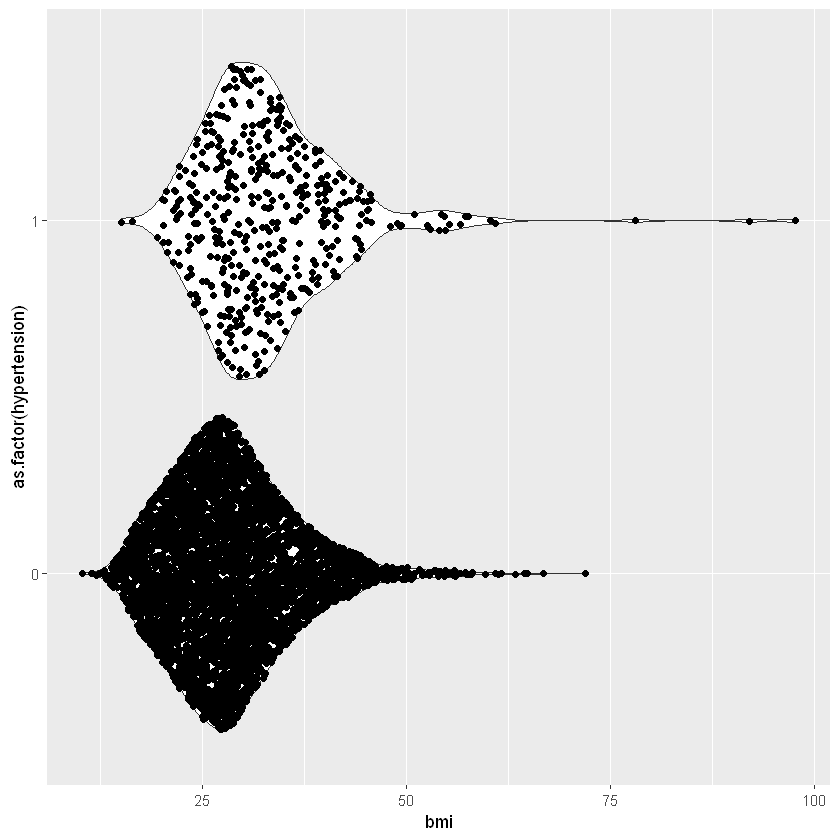

Warning message:
"Removed 201 rows containing non-finite values (stat_ydensity)."Warning message:
"Removed 201 rows containing non-finite values (stat_sina)."

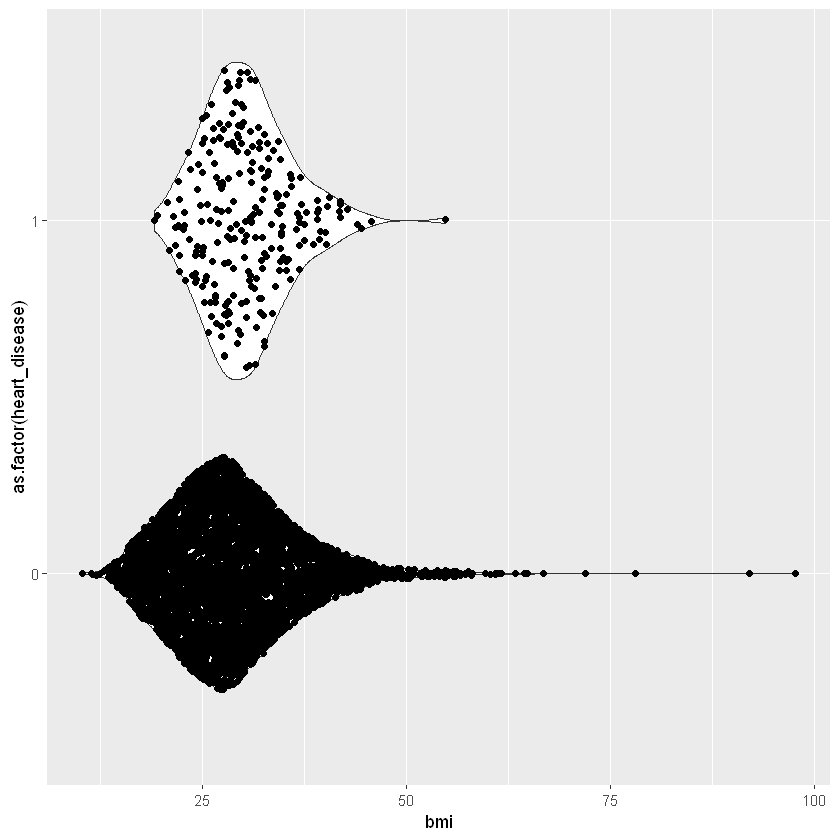

Warning message:
"Removed 201 rows containing non-finite values (stat_ydensity)."Warning message:
"Removed 201 rows containing non-finite values (stat_sina)."

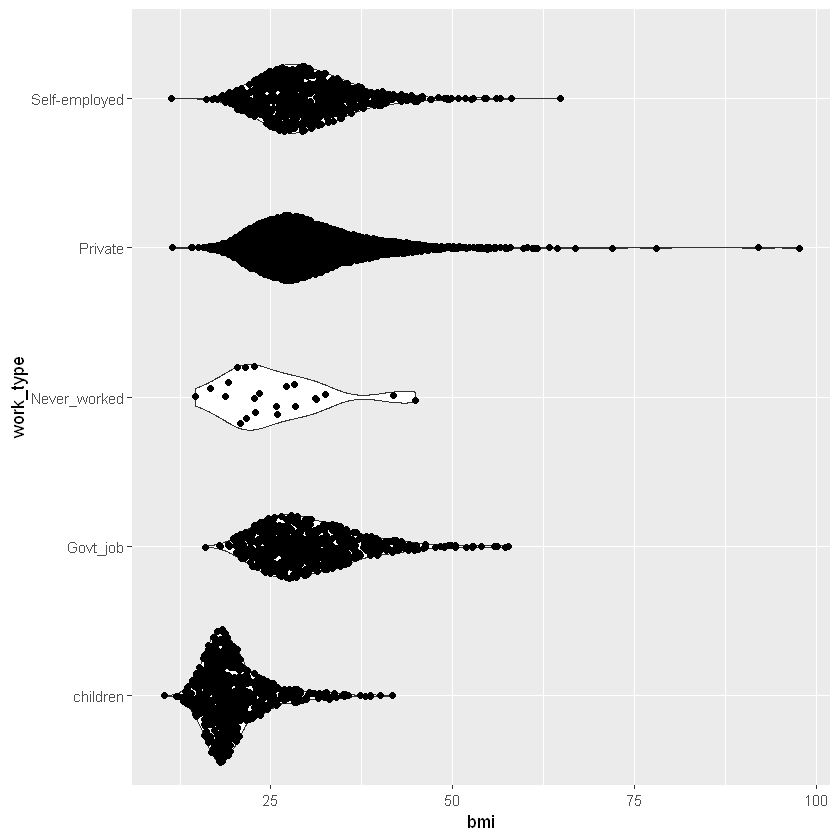

Warning message:
"Removed 201 rows containing non-finite values (stat_ydensity)."Warning message:
"Removed 201 rows containing non-finite values (stat_sina)."

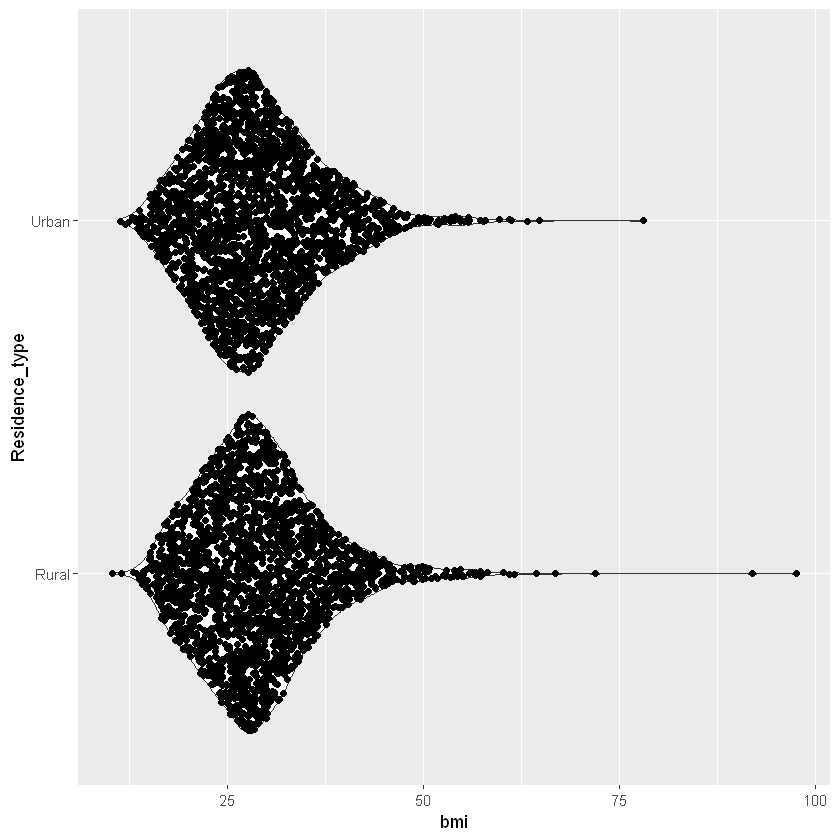

Warning message:
"Removed 201 rows containing non-finite values (stat_ydensity)."Warning message:
"Removed 201 rows containing non-finite values (stat_sina)."

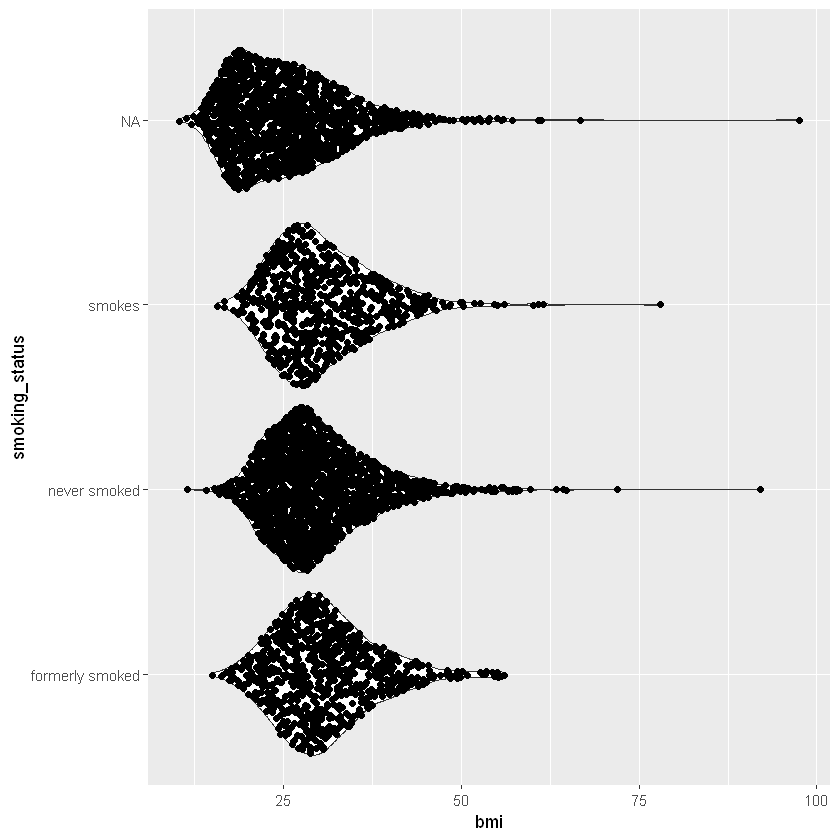

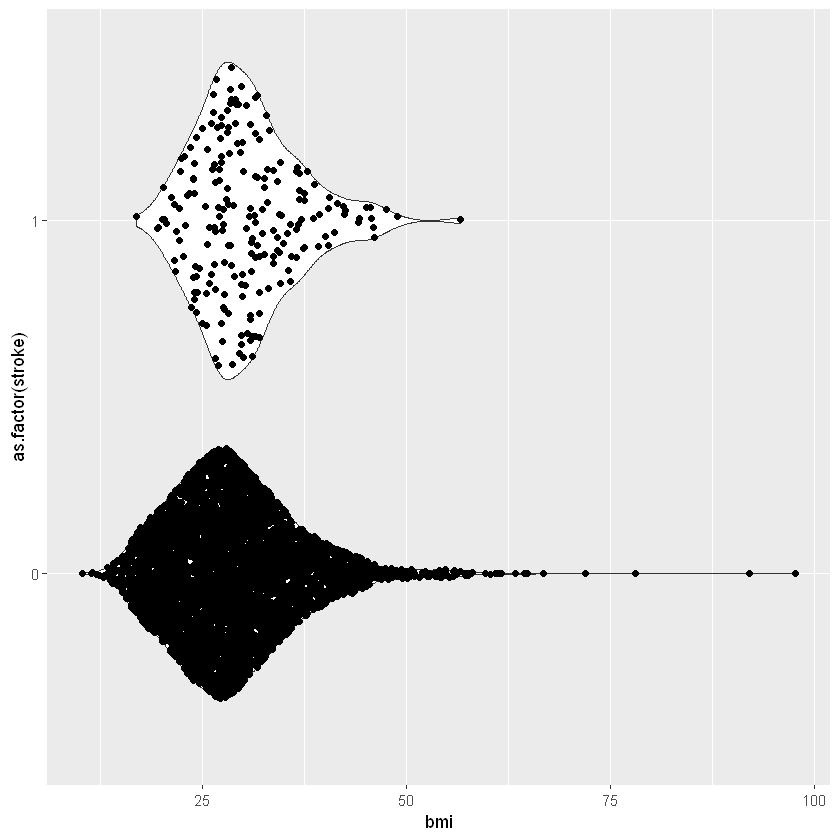

In [36]:
#par(mfrow=c(1,3))
#plot(as.numeric(df$gender), df$age)

ggplot(data = df) +
  aes(y = bmi, x = gender) +
  geom_violin() +
  geom_sina() +
  coord_flip()

ggplot(data = df) +
  aes(y = bmi, x = ever_married) +
  geom_violin() +
  geom_sina() +
  coord_flip()

ggplot(data = df) +
  aes(y = bmi, x = as.factor(hypertension)) +
  geom_violin() +
  geom_sina() +
  coord_flip()

ggplot(data = df) +
  aes(y = bmi, x = as.factor(heart_disease)) +
  geom_violin() +
  geom_sina() +
  coord_flip()

ggplot(data = df) +
  aes(y = bmi, x = work_type) +
  geom_violin() +
  geom_sina() +
  coord_flip()

ggplot(data = df) +
  aes(y = bmi, x = Residence_type) +
  geom_violin() +
  geom_sina() +
  coord_flip()

ggplot(data = df) +
  aes(y = bmi, x = smoking_status) +
  geom_violin() +
  geom_sina() +
  coord_flip()

ggplot(data = df) +
  aes(y = bmi, x = as.factor(stroke)) +
  geom_violin() +
  geom_sina() +
  coord_flip()

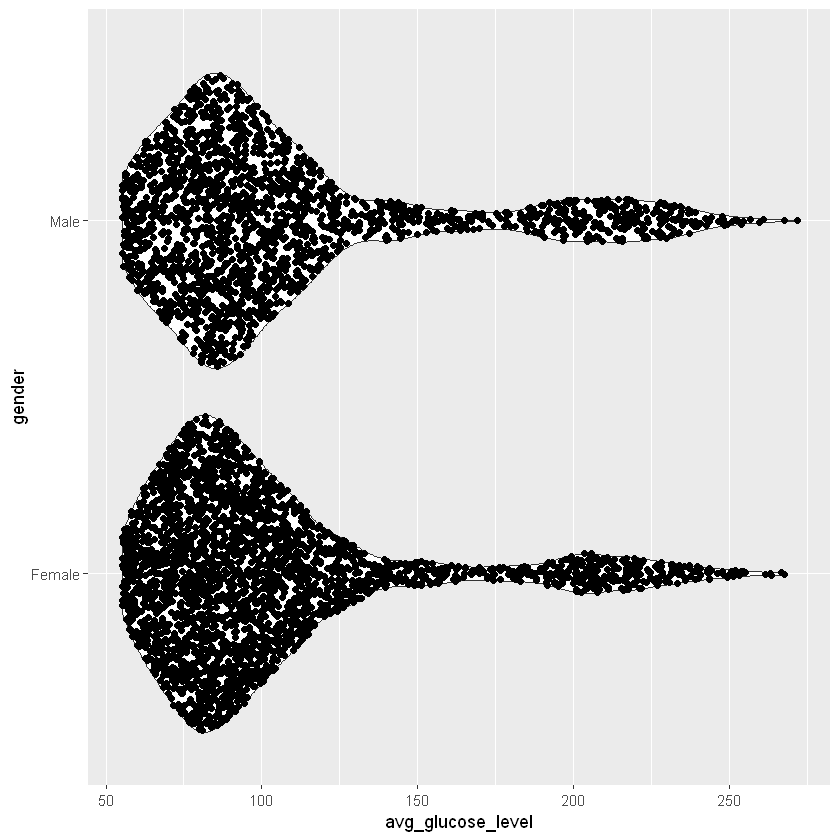

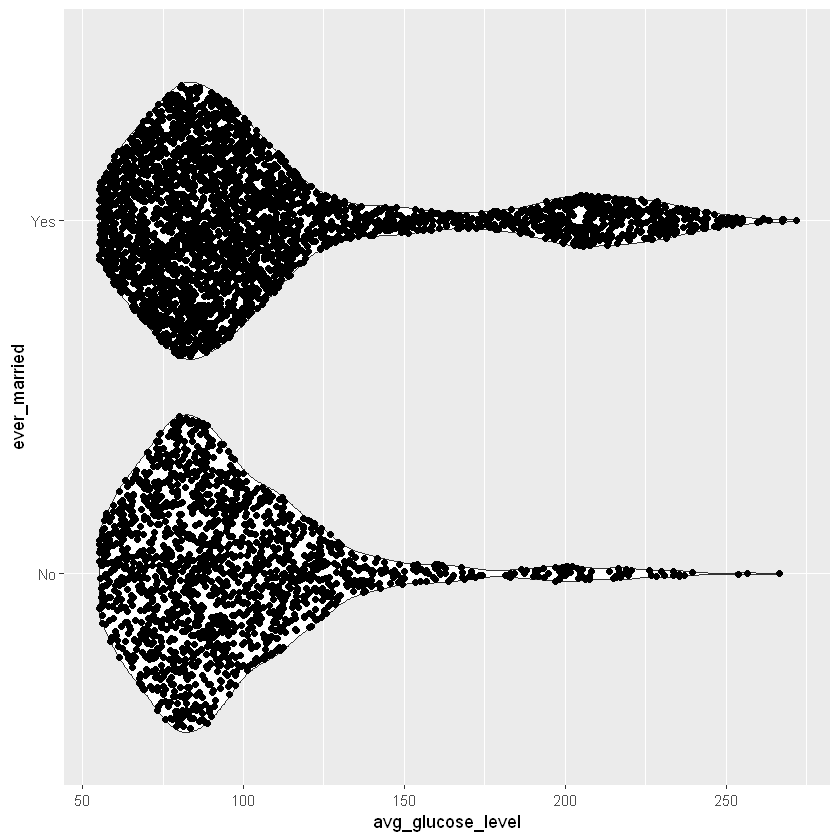

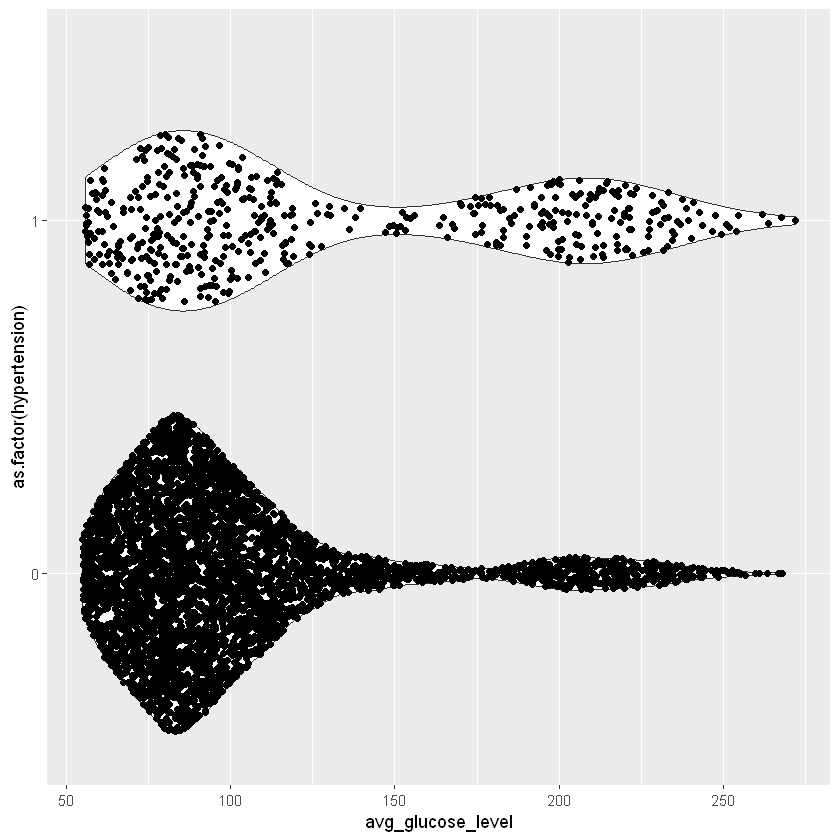

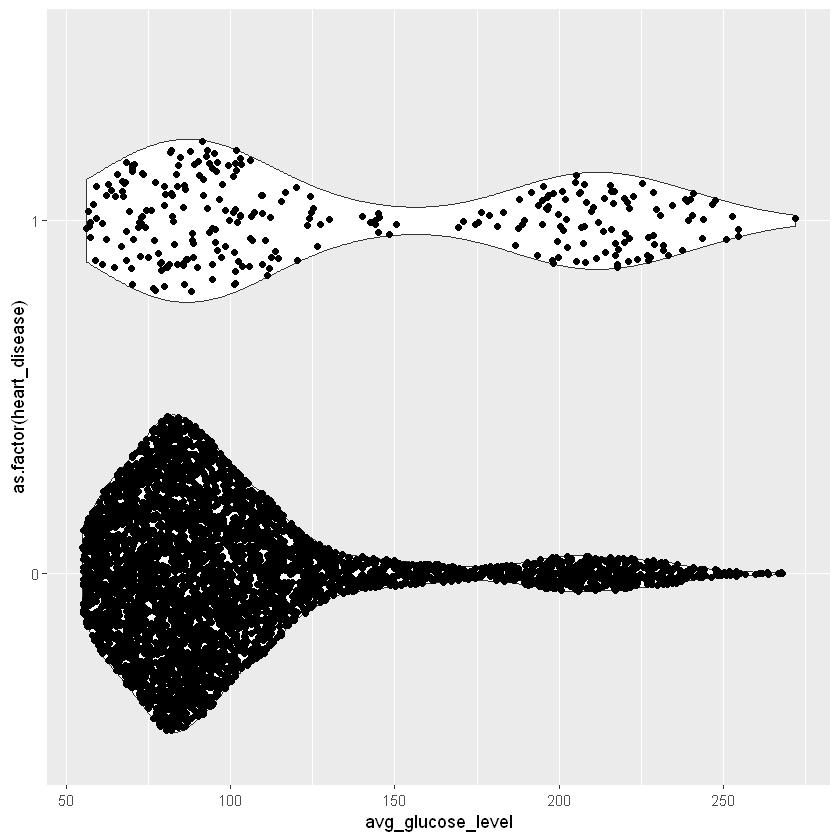

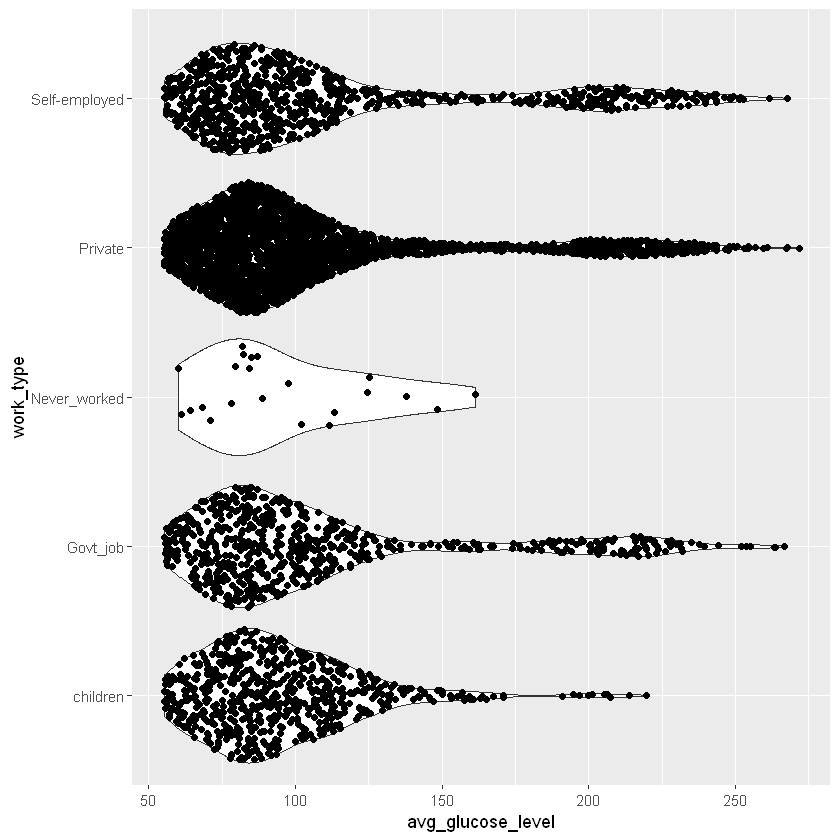

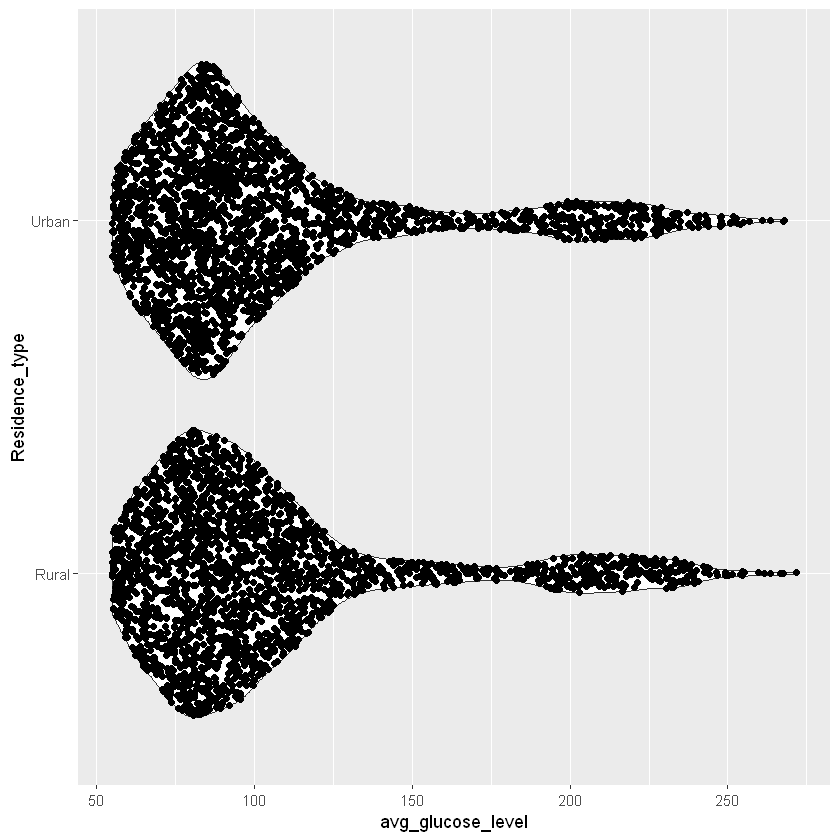

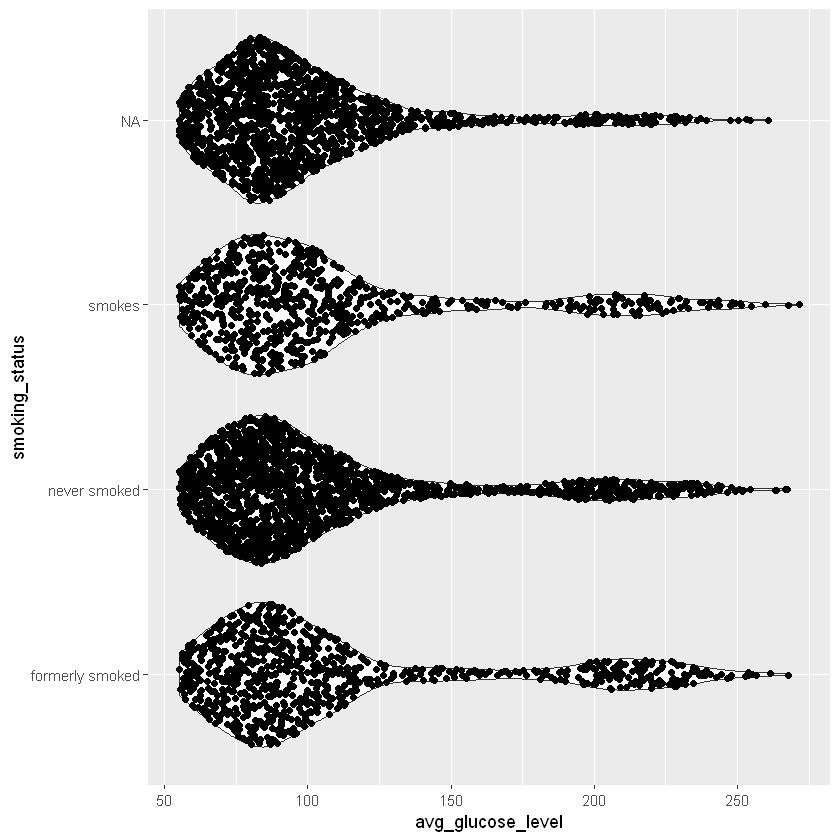

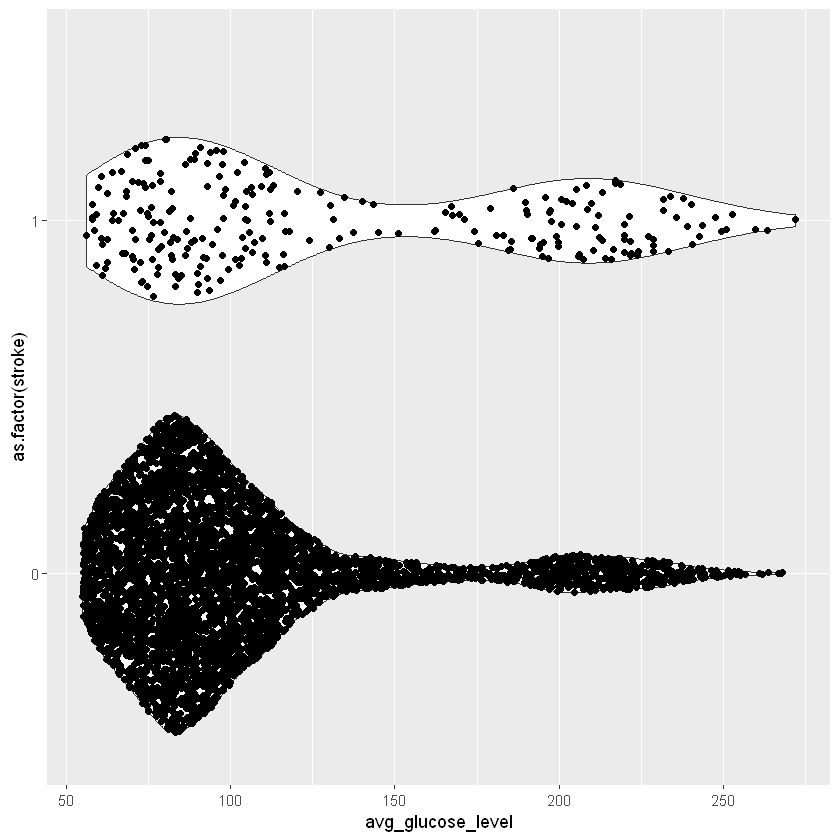

In [37]:
ggplot(data = df) +
  aes(y = avg_glucose_level, x = gender) +
  geom_violin() +
  geom_sina() +
  coord_flip()

ggplot(data = df) +
  aes(y = avg_glucose_level, x = ever_married) +
  geom_violin() +
  geom_sina() +
  coord_flip()

ggplot(data = df) +
  aes(y = avg_glucose_level, x = as.factor(hypertension)) +
  geom_violin() +
  geom_sina() +
  coord_flip()

ggplot(data = df) +
  aes(y = avg_glucose_level, x = as.factor(heart_disease)) +
  geom_violin() +
  geom_sina() +
  coord_flip()

ggplot(data = df) +
  aes(y = avg_glucose_level, x = work_type) +
  geom_violin() +
  geom_sina() +
  coord_flip()

ggplot(data = df) +
  aes(y = avg_glucose_level, x = Residence_type) +
  geom_violin() +
  geom_sina() +
  coord_flip()

ggplot(data = df) +
  aes(y = avg_glucose_level, x = smoking_status) +
  geom_violin() +
  geom_sina() +
  coord_flip()

ggplot(data = df) +
  aes(y = avg_glucose_level, x = as.factor(stroke)) +
  geom_violin() +
  geom_sina() +
  coord_flip()

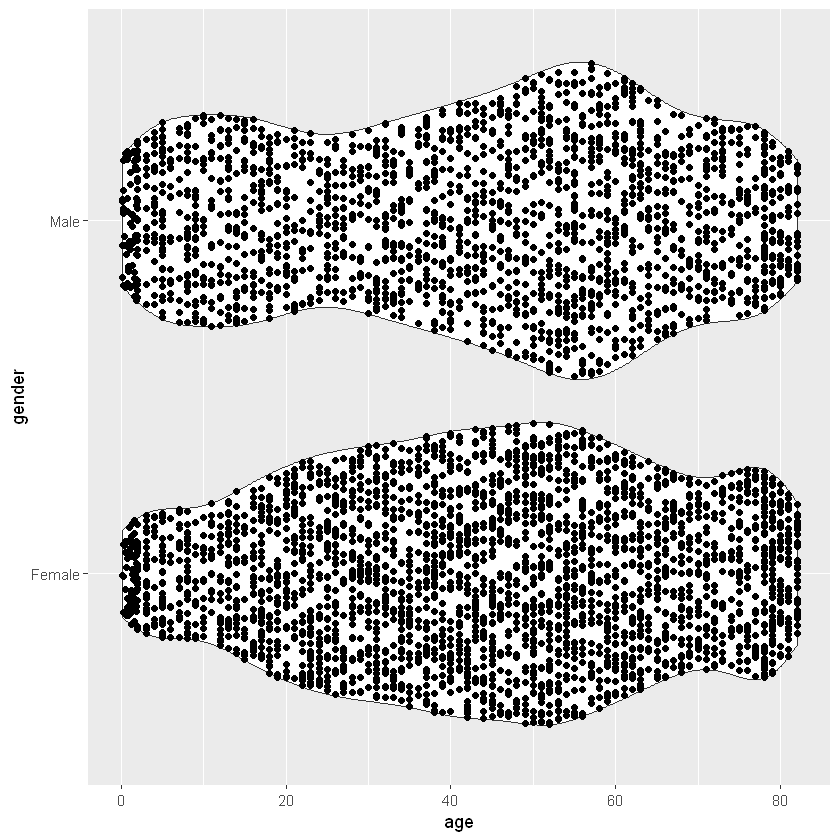

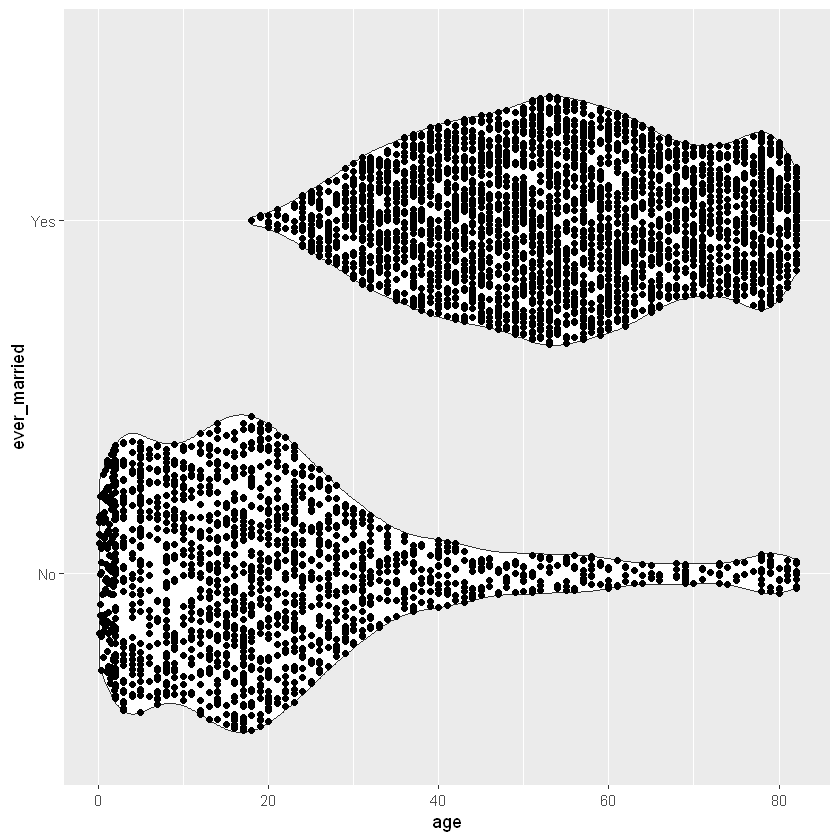

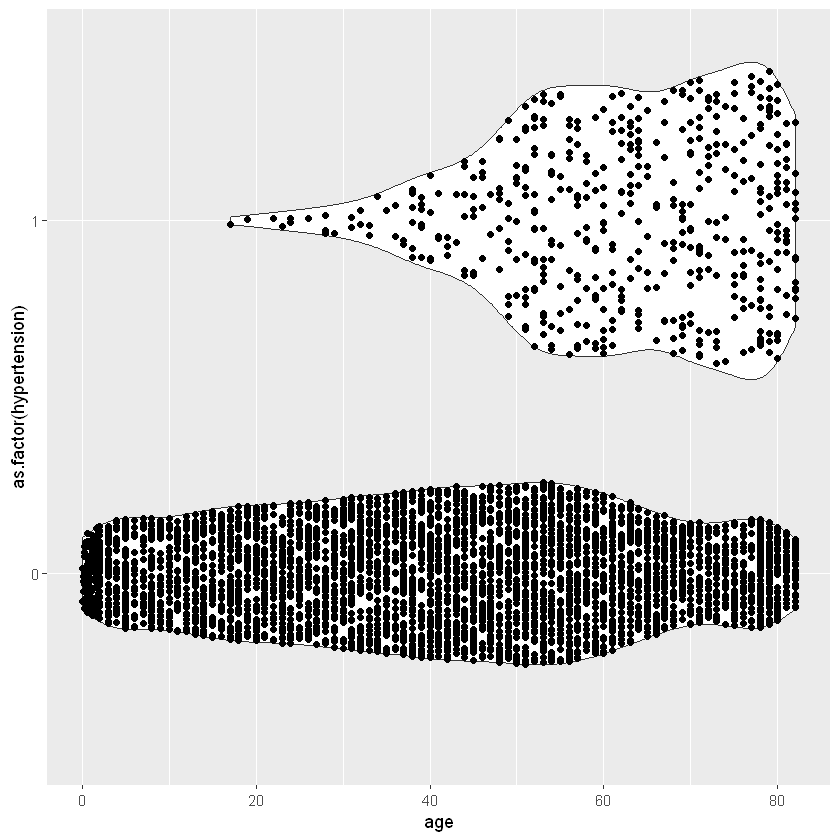

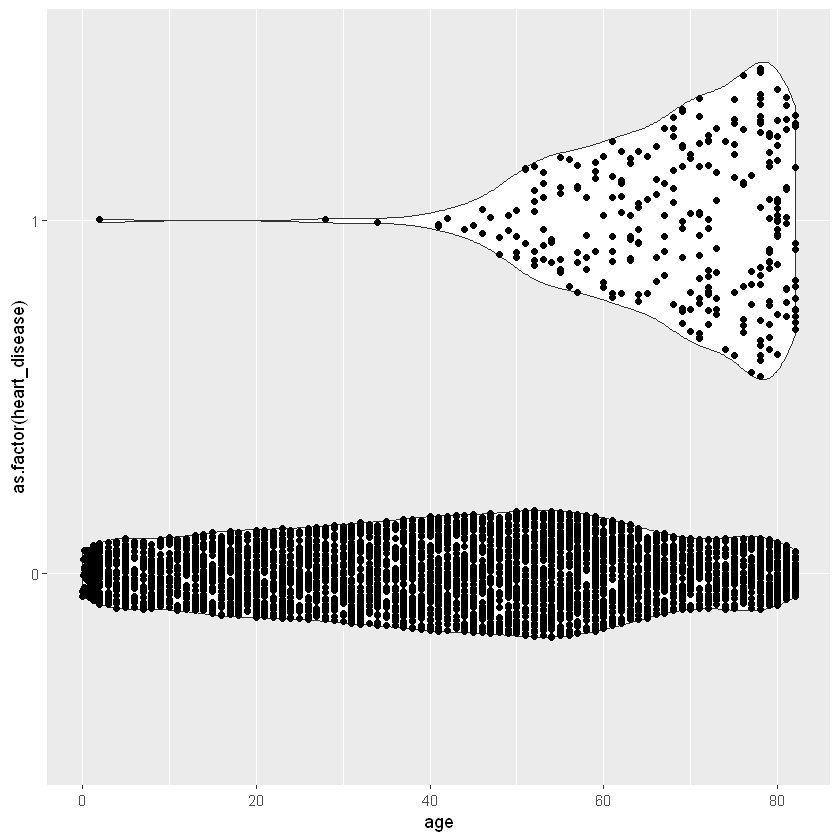

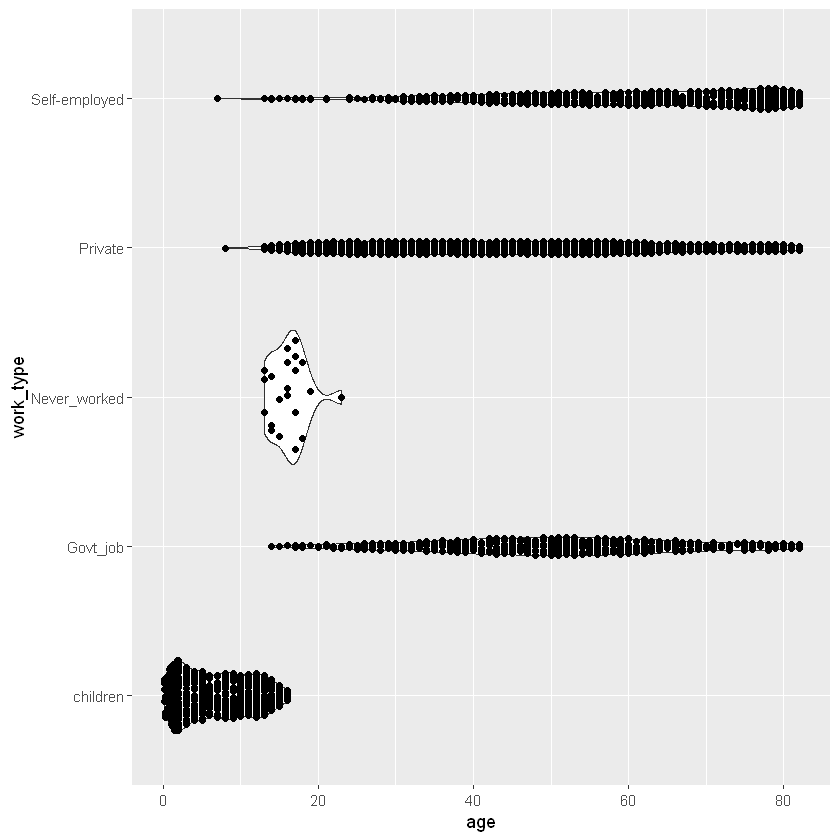

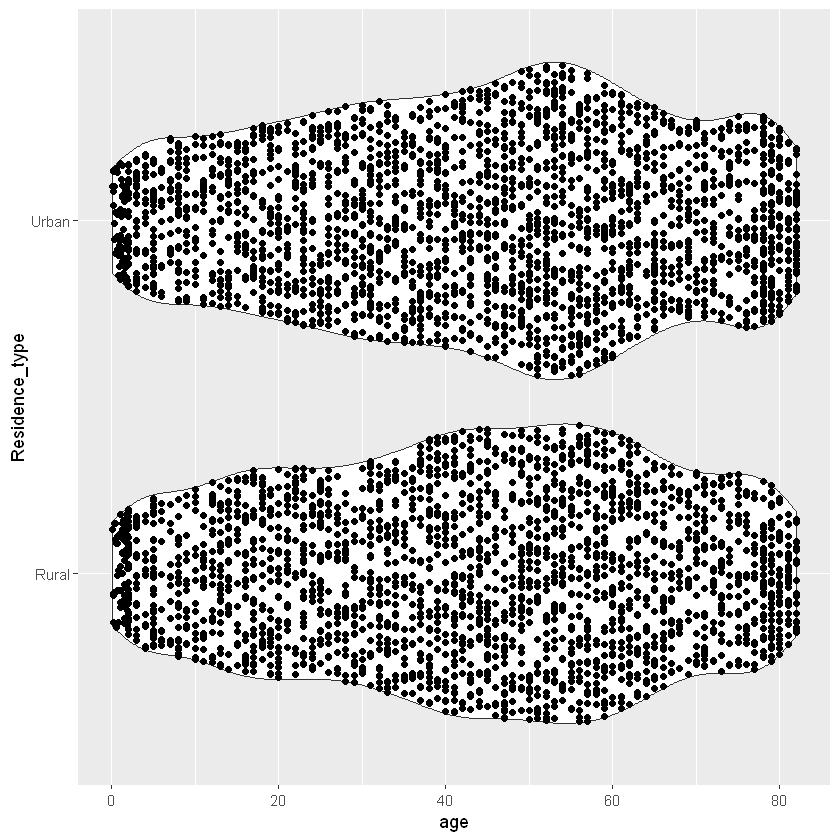

In [ ]:
ggplot(data = df) +
  aes(y = age, x = gender) +
  geom_violin() +
  geom_sina() +
  coord_flip()

ggplot(data = df) +
  aes(y = age, x = ever_married) +
  geom_violin() +
  geom_sina() +
  coord_flip()

ggplot(data = df) +
  aes(y = age, x = as.factor(hypertension)) +
  geom_violin() +
  geom_sina() +
  coord_flip()

ggplot(data = df) +
  aes(y = age, x = as.factor(heart_disease)) +
  geom_violin() +
  geom_sina() +
  coord_flip()

ggplot(data = df) +
  aes(y = age, x = work_type) +
  geom_violin() +
  geom_sina() +
  coord_flip()

ggplot(data = df) +
  aes(y = age, x = Residence_type) +
  geom_violin() +
  geom_sina() +
  coord_flip()

ggplot(data = df) +
  aes(y = age, x = smoking_status) +
  geom_violin() +
  geom_sina() +
  coord_flip()

ggplot(data = df) +
  aes(y = age, x = as.factor(stroke)) +
  geom_violin() +
  geom_sina() +
  coord_flip()

#### Párová analýza - numerické VS numerické

In [ ]:
df_num_only = subset(df, select=c("age", "bmi", "avg_glucose_level"))

#pairs(df_num_only, pch = 19)
plot(df$age, df$bmi)
plot(df$age, df$avg_glucose_level)
plot(df$bmi, df$avg_glucose_level)

### Korelácia

In [ ]:
dmy <- dummyVars(" ~ .", data = df)
trsf <- data.frame(predict(dmy, newdata = df))

In [ ]:
correlation <- cor(select(trsf, age, avg_glucose_level, gender.Male, gender.Female, stroke, bmi, hypertension
                          , heart_disease, ever_married.No, ever_married.Yes ), use="pairwise.complete.obs")
correlation

In [ ]:
corrplot(correlation, method = "number") 

# Hypotézy

### 1. Hypotéza <br>


H0: Kým je človek starší, tým je väčšia pravdepodobnosť na mozgovú mŕtvicu, teda vek ovplyvňuje mozgovú mŕtvicu. <br>
H1: Vek neovplyvňuje mozgovú mŕtvicu. <br>


### 2. Hypotéza <br>


H0: BMI ovplyvňuje mozgovú mŕtvicu. <br>
H1: BMI neovplyvňuje mozgovú mŕtvicu. <br>
    
    
    